In [ ]:
import pandas as pd
df = pd.read_csv('twitter_training.csv')

In [ ]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
print(df.isnull().sum())

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [ ]:
df.columns = ["ID", "Category", "Sentiment", "Text"]

In [ ]:
df = df.dropna(subset=["Text"])

In [ ]:
df.shape

(73995, 4)

In [ ]:
X= df['Text']
y= df['Sentiment']

In [ ]:
X

,Text
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...
...,...
74676,Just realized that the Windows partition of my...
74677,Just realized that my Mac window partition is ...
74678,Just realized the windows partition of my Mac ...
74679,Just realized between the windows partition of...


In [ ]:
y

,Sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
74676,Positive
74677,Positive
74678,Positive
74679,Positive


In [ ]:
unique_values = df['Sentiment'].unique()
print(unique_values)

['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [ ]:
import tensorflow as tf

In [ ]:
voc_size = 10000

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus=[]
for i in df.index: #iterate using the index of the current dataframe, not X
    review = re.sub('[^a-zA-Z]', ' ', df.loc[i, 'Text']) #use loc to access data by index and column name
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[1]

'im get borderland kill'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
onehot_repr=[one_hot(words, voc_size) for words in corpus]

In [ ]:
onehot_repr[ 1]

[9254, 8720, 2395, 3721]

In [ ]:
max_length = max(len(sentence.split()) for sentence in corpus)

print(f"The maximum length of the corpus is: {max_length}")

The maximum length of the corpus is: 163


In [ ]:
msg_length = 170
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen = msg_length)

In [ ]:
#creating a model
embedding_vector_features = 300
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = msg_length))
model.add(LSTM(100))
model.add(Dense(4, activation = 'softmax'))
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'], run_eagerly=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_numeric = le.fit_transform(y)

In [ ]:
import numpy as np
X_final = np.array(embedded_docs)
y_final=np.array(y_numeric)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_final, y_final, test_size= 0.33, random_state  =42)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [ ]:

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 90s 108ms/step - accuracy: 0.5404 - loss: 1.0767 - val_accuracy: 0.7352 - val_loss: 0.6966
Epoch 2/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 74s 96ms/step - accuracy: 0.8080 - loss: 0.5182 - val_accuracy: 0.7920 - val_loss: 0.5603
Epoch 3/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 74s 96ms/step - accuracy: 0.8697 - loss: 0.3507 - val_accuracy: 0.8137 - val_loss: 0.5224
Epoch 4/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 84s 109ms/step - accuracy: 0.9024 - loss: 0.2634 - val_accuracy: 0.8212 - val_loss: 0.5420
Epoch 5/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 141s 108ms/step - accuracy: 0.9222 - loss: 0.2084 - val_accuracy: 0.8347 - val_loss: 0.5272
Epoch 6/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 143s 109ms/step - accuracy: 0.9333 - loss: 0.1724 - val_accuracy: 0.8416 - val_loss: 0.5278
Epoch 7/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 84s 109ms/step - accuracy: 0.9451 - loss: 0.1442 - val_accuracy: 0.8484 - val_loss: 0.5581
Epoch 8/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 84s 108ms/step - accuracy: 0.9514 - loss: 0

In [ ]:
y_pred = model.predict(X_test)

764/764 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step


In [ ]:
y_pred = np.where(y_pred>0.6, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.831483680740407

In [ ]:
y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test_single, y_pred_single)
cm

array([[3781,  196,  112,  217],
       [ 634, 6249,  187,  300],
       [ 573,  256, 4869,  250],
       [ 641,  254,  203, 5697]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4306
           1       0.90      0.85      0.87      7370
           2       0.91      0.82      0.86      5948
           3       0.88      0.84      0.86      6795

   micro avg       0.89      0.83      0.86     24419
   macro avg       0.89      0.83      0.86     24419
weighted avg       0.89      0.83      0.86     24419
 samples avg       0.83      0.83      0.83     24419



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


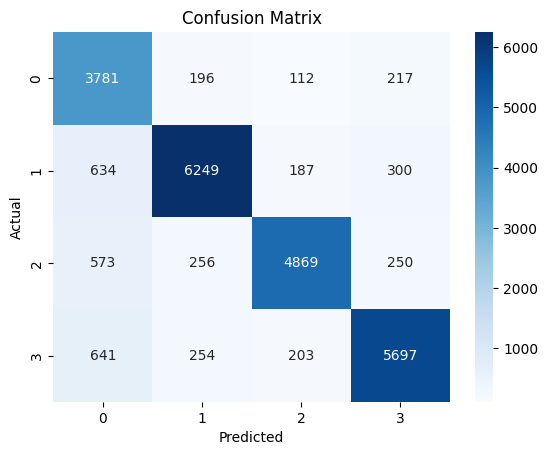

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


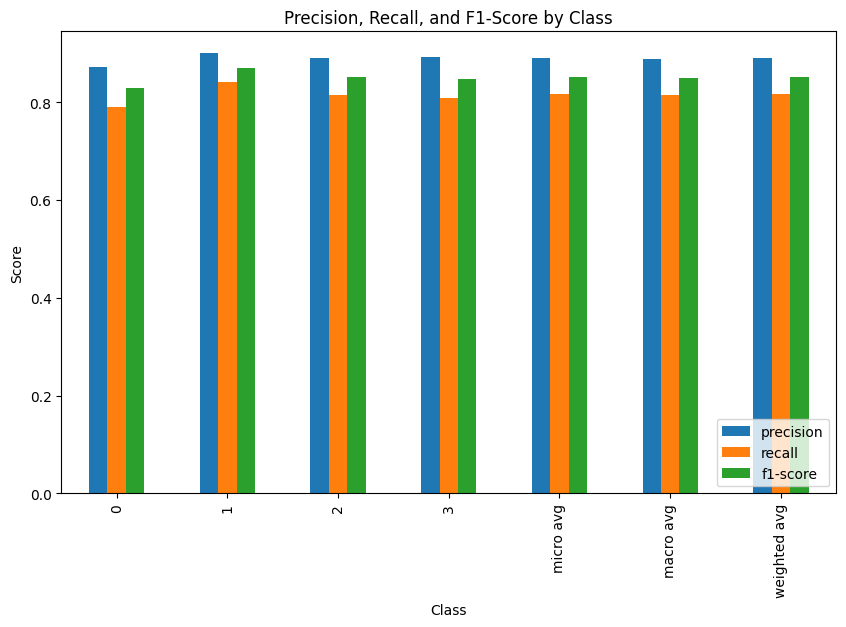

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Assuming y_test is your true labels and y_pred is your predicted labels
# Get unique class labels from y_test_single (defined in a previous cell)
class_names = np.unique(y_test_single).astype(str)

# Get classification report as a DataFrame
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True) # Replace y_true with y_test
df_report = pd.DataFrame(report).transpose()

# Bar plot for precision, recall, F1-score
df_report[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score by Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.legend(loc='lower right')
plt.show()

764/764 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


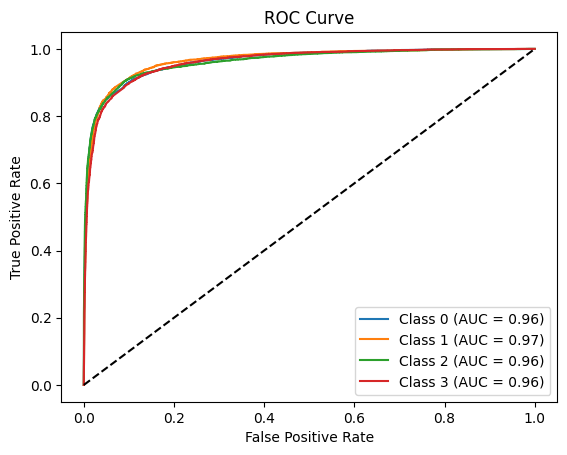

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Convert y_true and y_pred to binary if multi-class
y_true_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust for your classes
y_pred_prob = model.predict(X_test)

for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_name} (AUC = {roc_auc_score(y_true_bin[:, i], y_pred_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
